In [8]:
import pickle

#imgs und gts
imgs_20xRenamed = []
with open('save_data/3D_images_Renamed/imgs_20xRenamed.pkl', 'rb') as f:
    imgs_20xRenamed = pickle.load(f)
gt_3D_relabelled = []
with open('save_data/gt_relabeled/gt_3D_relabelled.pkl', 'rb') as f:
    gt_3D_relabelled = pickle.load(f)

#masken
masks3D = []
with open('save_data/masks/masks3D.pkl', 'rb') as f:
    masks3D = pickle.load(f)
masks3D_nnUNet_Instances = []
with open('save_data/masks/masks3D_nnUNet_Instances_relabeled.pkl', 'rb') as f:
    masks3D_nnUNet_Instances = pickle.load(f)
masks3D_Deepcell = []
with open('save_data/masks/masks3D_Deepcell.pkl', 'rb') as f:
    masks3D_Deepcell = pickle.load(f)
masks3D_20xRenamed = []
with open('save_data/masks/20xRenamed/masks3D_CELLPOSE_RUN_1.pkl', 'rb') as f:
    masks3D_20xRenamed = pickle.load(f)
masks_LabelingApp = []
with open('Labeling_App/helpers/masks3D_CELLPOSE_RUN_1_Quadrants.pkl', 'rb') as f:
    masks_LabelingApp = pickle.load(f)
normalized_channels = []
with open('Labeling_App/helpers/normalized_channels.pkl', 'rb') as f:
    normalized_channels = pickle.load(f)

masks_LabelingApp_r = []
with open('Labeling_App/helpers/Aufteilung_Labeling_App/rüdiger/masks3D_CELLPOSE_RUN_1_Quadrants.pkl', 'rb') as f:
    masks_LabelingApp_r = pickle.load(f)
normalized_channels_r = []
with open('Labeling_App/helpers/Aufteilung_Labeling_App/rüdiger/normalized_channels.pkl', 'rb') as f:
    normalized_channels_r = pickle.load(f)

for i, gt in enumerate(gt_3D_relabelled):
    if masks3D[i].shape != gt.shape:
        print(masks3D[i].shape)
    if masks3D_nnUNet_Instances[i].shape != gt.shape:
        print(masks3D_nnUNet_Instances[i].shape)    

#Labels And IoUs
best_IoUs_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Cellpose.pkl', 'rb') as f:
    best_IoUs_3D_Cellpose = pickle.load(f)
best_labels_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Cellpose.pkl', 'rb') as f:
    best_labels_3D_Cellpose = pickle.load(f)

best_IoUs_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_nnU.pkl', 'rb') as f:
    best_IoUs_3D_nnU = pickle.load(f)
best_labels_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_labels_3D_nnU.pkl', 'rb') as f:
    best_labels_3D_nnU = pickle.load(f)

best_IoUs_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Deepcell.pkl', 'rb') as f:
    best_IoUs_3D_Deepcell = pickle.load(f)
best_labels_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Deepcell.pkl', 'rb') as f:
    best_labels_3D_Deepcell = pickle.load(f)


In [9]:
print(len(normalized_channels_r))
print(normalized_channels_r[0].shape)
print(masks_LabelingApp[0].shape)

2
(63, 1024, 1024, 4)
(28, 1024, 1024)


In [5]:
print(len(imgs_20xRenamed))

22


In [2]:
img = masks3D_20xRenamed[5]
print(img.shape)

(17, 1024, 1024)


In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.measure import regionprops
import numpy as np

binary = img[8,:,:] >= 1
plt.imshow(binary)
plt.show()
labeled, _ = label(binary)
props = regionprops(labeled)

sizes = [prop.area for prop in props]  
print(np.average(sizes))
diameters = [np.cbrt(p.area) for p in props]  
print(np.average(diameters))
diameters = [np.sqrt(p.area) for p in props]
print(np.average(diameters))

In [ ]:
#import re
#import os
#import tifffile as tif
#
#imgs_20xRenamed = []
#save_dir = "20xRenamed/20xRenamed"
#image_ext = ".tif"
## Get all .tif files
#image_files = [file for file in os.listdir(save_dir) if file.endswith(image_ext) if file.startswith('img')]
#
#def extract_number(filename):
#    match = re.match(r"img_(\d+)\.tif", filename)
#    return int(match.group(1)) if match else float('inf')
#
#image_files_sorted = sorted(image_files, key=extract_number)
#
## Load images in sorted order
#for file in image_files_sorted:
#    img = tif.imread(os.path.join(save_dir, file))
#    print(f"image shape {img.shape} in {file}")
#    imgs_20xRenamed.append(img)

In [ ]:
from Labeling_App.helpers.blob_data_helper import BlobDataHelper
blb = BlobDataHelper()

In [44]:
import importlib
import Labeling_App.helpers.blob_data_helper
importlib.reload(Labeling_App.helpers.blob_data_helper)

from Labeling_App.helpers.blob_data_helper import BlobDataHelper, get_next_undef
blb = BlobDataHelper()


In [ ]:
#print(np.unique(masks3D_20xRenamed[3])) ->2128
import matplotlib.pyplot as plt
import numpy as np
slice = 3
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(image_index=0, blob_index=7)
print(inside_box)
print(bbox.shape)
print(edge_blob)
if 3 > bbox.shape[0]:
    slice = bbox.shape[0] - 1
if 1 == bbox.shape[0]:
    slice = 0
plt.imshow(bbox[slice,:,:])
plt.show()

In [142]:
import importlib
import Labeling_App.helpers.visualization_helper
importlib.reload(Labeling_App.helpers.visualization_helper)

from Labeling_App.helpers.visualization_helper import plot_image_with_clustered_contours_RGB

In [143]:
import importlib
import helpers.features_helper
importlib.reload(helpers.features_helper)

from helpers.features_helper import extract_features_and_contours, cluster_features
import numpy as np

In [88]:
image_index = 13
slice = 15
mask = masks3D_20xRenamed[image_index][slice,:,:]
img = imgs_20xRenamed[image_index][slice, 0:2, :, :]
print(img.shape)
img_reshaped = img.transpose(1, 2, 0) 
print(img_reshaped.shape)
img_rgb = np.concatenate([img_reshaped.astype(np.uint8), np.zeros((1024, 1024, 1), dtype=np.uint8)], axis=2)
print(img_rgb.shape)

(2, 1024, 1024)
(1024, 1024, 2)
(1024, 1024, 3)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb[:,:,:])
plt.axis("off")
plt.show()

In [118]:
contours_with_features = extract_features_and_contours(mask)

In [147]:
contours_with_classes = cluster_features(contours_with_features, k=3)

511
511


In [92]:
print("Available labels:", list(contours_with_features.keys()))


Available labels: [np.uint16(1), np.uint16(2), np.uint16(12), np.uint16(13), np.uint16(14), np.uint16(19), np.uint16(23), np.uint16(25), np.uint16(26), np.uint16(33), np.uint16(35), np.uint16(36), np.uint16(37), np.uint16(38), np.uint16(39), np.uint16(41), np.uint16(42), np.uint16(43), np.uint16(47), np.uint16(49), np.uint16(50), np.uint16(51), np.uint16(52), np.uint16(53), np.uint16(54), np.uint16(55), np.uint16(56), np.uint16(57), np.uint16(58), np.uint16(59), np.uint16(61), np.uint16(62), np.uint16(64), np.uint16(65), np.uint16(66), np.uint16(67), np.uint16(68), np.uint16(69), np.uint16(72), np.uint16(73), np.uint16(74), np.uint16(75), np.uint16(76), np.uint16(77), np.uint16(78), np.uint16(79), np.uint16(80), np.uint16(81), np.uint16(82), np.uint16(83), np.uint16(86), np.uint16(87), np.uint16(88), np.uint16(89), np.uint16(90), np.uint16(91), np.uint16(92), np.uint16(93), np.uint16(94), np.uint16(95), np.uint16(97), np.uint16(98), np.uint16(99), np.uint16(100), np.uint16(101), np.uin

In [ ]:
label = 25
#print("Combined contour points for label", label)
#print(contours_with_features[label]['contours'])

# Print the features list
print(f"the {len(contours_with_classes[label]['features'])} Features for label {label}")
print(contours_with_classes[label]['features'])
print(f"make it class: {contours_with_classes[label]['class']}")

contour = contours_with_classes[label]['contours']

plt.plot(contour[:, 1], contour[:, 0], '-o')  # X=cols, Y=rows
plt.gca().invert_yaxis()  # Optional: to match image coordinates
plt.title(f'Contour for label {label}')
plt.axis('equal')
plt.show()
plt.imshow(mask == label)
plt.show()

In [ ]:
plot_image_with_clustered_contours_RGB(img_rgb, contours_with_classes=contours_with_classes)


In [ ]:
blobs_per_image = [len(np.unique(mask)) for mask in masks3D_20xRenamed]

In [ ]:
print(len(blobs_per_image))
print(blobs_per_image[0])

In [69]:
import json, os
def label_all_img0(blob_count):
    label_store = {"img0": {str(i): 1 for i in range(1, blob_count + 1)}}
    with open("label_store.json", "w") as f:
        json.dump(label_store, f, indent=2)
label_all_img0(2375)

In [ ]:
SAVE_FILE = "label_store.json"
SAVE_INTERVAL = 3
save_counter = 0
# ---- Load Label Store ----
if os.path.exists(SAVE_FILE):
    with open(SAVE_FILE, 'r') as f:
        label_store = json.load(f)
    print(get_next_undef(label_store))

In [ ]:
all_shapes = []
for k in range(len(masks3D_20xRenamed)):
    print(f"***************** IMAGE {k} *****************")
    shapes = []
    length = len(np.unique(masks3D_20xRenamed[k]))
    for i in range(1, length):
        if i % 100 == 0:
            print(f"iteration {i} von {length}")
        bbox, blob_index, image_index, edge_blob = blb.get_blob(image_index=0, blob_index=i, offset=0)
        if not edge_blob:
            shapes.append(bbox.shape)
    all_shapes.append(shapes)

In [33]:
import pickle 
with open('all_shapes.pkl', 'wb') as handle:
    pickle.dump(all_shapes, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
import numpy as np

for idx, shape_list in enumerate(all_shapes):
    x_sizes = [shape[1] for shape in shape_list]
    y_sizes = [shape[2] for shape in shape_list]

    x_sizes = np.array(x_sizes)
    y_sizes = np.array(y_sizes)

    top5_x = np.sort(x_sizes)[-5:][::-1]
    top5_y = np.sort(y_sizes)[-5:][::-1]

    mean_x = np.mean(x_sizes)
    mean_y = np.mean(y_sizes)

    print(f"Shape List {idx}:")
    print("  Top 5 X sizes:", top5_x)
    print("  Top 5 Y sizes:", top5_y)
    print("  Mean X size:", mean_x)
    print("  Mean Y size:", mean_y)
    print()


In [7]:
import json
path1 = '/Users/davidexler/Documents/Masterarbeit/repo/Masterarbeit/save_data/IoU/results_cellpose.json'
path2 = '/Users/davidexler/Documents/Masterarbeit/repo/Masterarbeit/save_data/IoU/results_nnUNet.json'
path3 = '/Users/davidexler/Documents/Masterarbeit/repo/Masterarbeit/save_data/IoU/results_deepcell.json'

data = []
with open(path1, 'r') as f:
    data.append(json.load(f))
with open(path2, 'r') as f:
    data.append(json.load(f))
with open(path3, 'r') as f:
    data.append(json.load(f))


In [ ]:
print(data[0].keys())

dict_keys(['TP', 'FP', 'FN', 'SQ', 'RQ', 'IQ', 'ipq'])


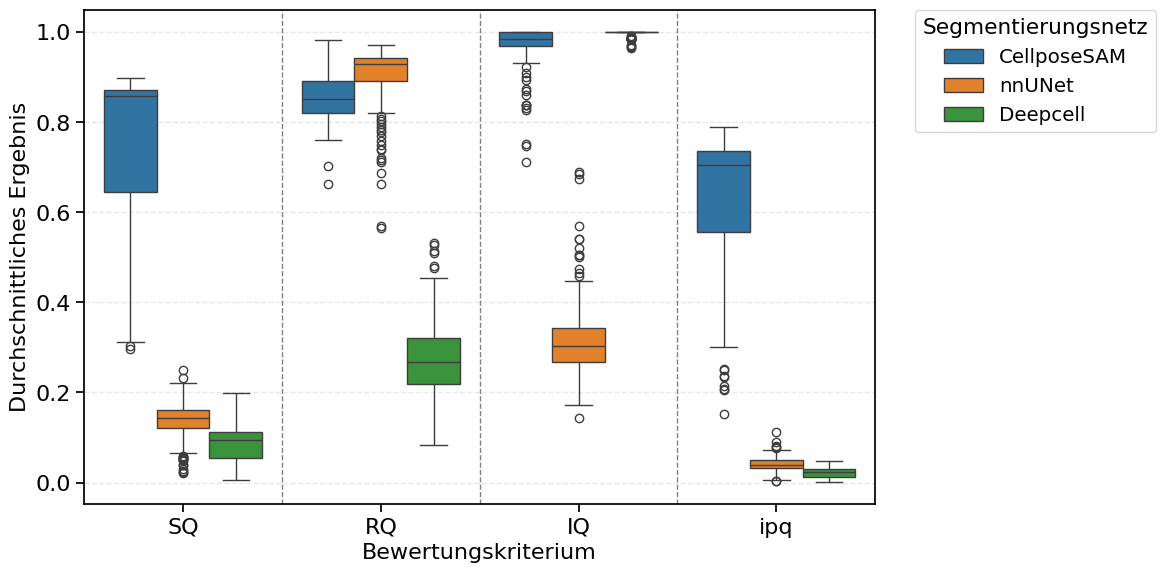

In [25]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_context("notebook", font_scale=1.3)  # Try 1.5 for even larger fonts

data = []
with open(path1, 'r') as f:
    data.append(json.load(f))
with open(path2, 'r') as f:
    data.append(json.load(f))
with open(path3, 'r') as f:
    data.append(json.load(f))

# Network labels
network_names = ['CellposeSAM', 'nnUNet', 'Deepcell']
score_keys = ['SQ', 'RQ', 'IQ', 'ipq']

# Convert to long-form DataFrame for seaborn
records = []

for net_idx, net_data in enumerate(data):
    for metric in score_keys:
        scores = net_data[metric]
        for exp_idx, score in enumerate(scores):
            records.append({
                'Network': network_names[net_idx],
                'Experiment': exp_idx,
                'Metric': metric,
                'Score': score
            })

df = pd.DataFrame.from_records(records)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='Metric', y='Score', hue='Network')

# Add vertical dashed lines between metrics
for x in range(len(score_keys) - 1):  # places at 0.5, 1.5, 2.5
    plt.axvline(x + 0.5, color='gray', linestyle='--', linewidth=1)

# Title and styling
plt.title("")
plt.xlabel("Bewertungskriterium", fontsize=16)
plt.ylabel("Durchschnittliches Ergebnis", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)  # Keep horizontal grid only
plt.legend(title='Segmentierungsnetz', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [38]:
import numpy as np
def calculate_statistics(scores):
    mean = np.mean(scores)
    median = np.median(scores)
    std_dev = np.std(scores)
    return mean, median, std_dev

mean, median, std_dev = calculate_statistics(data[0]['SQ'])
print(f"Cellpose, SQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[0]['RQ'])
print(f"Cellpose, RQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[0]['IQ'])
print(f"Cellpose, IQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[0]['ipq'])
print(f"Cellpose, ipq; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
print("\n")
print("-"*100)
print("\n")

mean, median, std_dev = calculate_statistics(data[1]['SQ'])
print(f"nnUNet, SQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[1]['RQ'])
print(f"nnUNet, RQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[1]['IQ'])
print(f"nnUNet, IQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[1]['ipq'])
print(f"nnUNet, ipq; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
print("\n")
print("-"*100)
print("\n")


mean, median, std_dev = calculate_statistics(data[2]['SQ'])
print(f"Deepcell, SQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[2]['RQ'])
print(f"Deepcell, RQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[2]['IQ'])
print(f"Deepcell, IQ; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")
mean, median, std_dev = calculate_statistics(data[2]['ipq'])
print(f"Deepcell, ipq; Mean: {mean:.4f}, Median: {median:.4f}, Standard Deviation: {std_dev:.4f}")


Cellpose, SQ; Mean: 0.7610, Median: 0.8577, Standard Deviation: 0.1748
Cellpose, RQ; Mean: 0.8585, Median: 0.8512, Standard Deviation: 0.0561
Cellpose, IQ; Mean: 0.9699, Median: 0.9857, Standard Deviation: 0.0535
Cellpose, ipq; Mean: 0.6366, Median: 0.7048, Standard Deviation: 0.1549


----------------------------------------------------------------------------------------------------


nnUNet, SQ; Mean: 0.1363, Median: 0.1433, Standard Deviation: 0.0441
nnUNet, RQ; Mean: 0.8973, Median: 0.9304, Standard Deviation: 0.0776
nnUNet, IQ; Mean: 0.3260, Median: 0.3035, Standard Deviation: 0.0949
nnUNet, ipq; Mean: 0.0398, Median: 0.0384, Standard Deviation: 0.0169


----------------------------------------------------------------------------------------------------


Deepcell, SQ; Mean: 0.0860, Median: 0.0952, Standard Deviation: 0.0436
Deepcell, RQ; Mean: 0.2754, Median: 0.2674, Standard Deviation: 0.0844
Deepcell, IQ; Mean: 0.9963, Median: 1.0000, Standard Deviation: 0.0075
Deepcell, ipq; 

In [49]:
from scipy.stats import ttest_ind
import numpy as np

def one_sided_ttest_higher(group1, group2, label="", correction_factor=1):
    """
    Performs a one-sided t-test with H1: group1 > group2
    Assumes group1 is expected to have a higher mean than group2.
    """
    t_stat, p_two_sided = ttest_ind(group1, group2, equal_var=False)
    p_one_sided = p_two_sided / 2

    # If the mean is actually lower, then the p-value is 1 (not significant in desired direction)
    if np.mean(group1) <= np.mean(group2):
        p_one_sided = 1.0

    corrected_p = min(p_one_sided * correction_factor, 1.0)
    if label:
        print(f"{label}: one-sided p = {p_one_sided:.4e}, corrected p = {corrected_p:.4e}")
    return p_one_sided, corrected_p

# === Metric: SQ ===
print(f"\n=== Metric: SQ ===")
one_sided_ttest_higher(data[0]['SQ'], data[1]['SQ'], label="Cellpose > nnUNet (SQ)", correction_factor=3)
one_sided_ttest_higher(data[0]['SQ'], data[2]['SQ'], label="Cellpose > Deepcell (SQ)", correction_factor=3)
one_sided_ttest_higher(data[1]['SQ'], data[2]['SQ'], label="nnUNet > Deepcell (SQ)", correction_factor=3)

# === Metric: RQ ===
print(f"\n=== Metric: RQ ===")
one_sided_ttest_higher(data[1]['RQ'], data[0]['RQ'], label="nnUNet > Cellpose (RQ)", correction_factor=3)
one_sided_ttest_higher(data[0]['RQ'], data[2]['RQ'], label="Cellpose > Deepcell (RQ)", correction_factor=3)
one_sided_ttest_higher(data[1]['RQ'], data[2]['RQ'], label="nnUNet > Deepcell (RQ)", correction_factor=3)

# === Metric: IQ ===
print(f"\n=== Metric: IQ ===")
one_sided_ttest_higher(data[0]['IQ'], data[1]['IQ'], label="Cellpose > nnUNet (IQ)", correction_factor=3)
one_sided_ttest_higher(data[2]['IQ'], data[0]['IQ'], label="Deepcell > Cellpose (IQ)", correction_factor=3)
one_sided_ttest_higher(data[2]['IQ'], data[1]['IQ'], label="Deepcell > nnUNet (IQ)", correction_factor=3)

# === Metric: ipq ===
print(f"\n=== Metric: IPQ ===")
one_sided_ttest_higher(data[0]['ipq'], data[1]['ipq'], label="Cellpose > nnUNet (ipq)", correction_factor=3)
one_sided_ttest_higher(data[0]['ipq'], data[2]['ipq'], label="Cellpose > Deepcell (ipq)", correction_factor=3)
one_sided_ttest_higher(data[1]['ipq'], data[2]['ipq'], label="nnUNet > Deepcell (ipq)", correction_factor=3)




=== Metric: SQ ===
Cellpose > nnUNet (SQ): one-sided p = 1.0332e-79, corrected p = 3.0997e-79
Cellpose > Deepcell (SQ): one-sided p = 4.0156e-84, corrected p = 1.2047e-83
nnUNet > Deepcell (SQ): one-sided p = 5.5338e-18, corrected p = 1.6601e-17

=== Metric: RQ ===
nnUNet > Cellpose (RQ): one-sided p = 3.4764e-06, corrected p = 1.0429e-05
Cellpose > Deepcell (RQ): one-sided p = 2.3721e-148, corrected p = 7.1162e-148
nnUNet > Deepcell (RQ): one-sided p = 6.6453e-156, corrected p = 1.9936e-155

=== Metric: IQ ===
Cellpose > nnUNet (IQ): one-sided p = 5.0446e-141, corrected p = 1.5134e-140
Deepcell > Cellpose (IQ): one-sided p = 6.7763e-08, corrected p = 2.0329e-07
Deepcell > nnUNet (IQ): one-sided p = 4.2921e-113, corrected p = 1.2876e-112

=== Metric: IPQ ===
Cellpose > nnUNet (ipq): one-sided p = 1.7973e-80, corrected p = 5.3919e-80
Cellpose > Deepcell (ipq): one-sided p = 1.5923e-81, corrected p = 4.7769e-81
nnUNet > Deepcell (ipq): one-sided p = 5.7686e-19, corrected p = 1.7306e-18


(np.float64(5.768578291708198e-19), np.float64(1.7305734875124595e-18))

In [43]:
from scipy.stats import ttest_ind, f_oneway
import numpy as np

metric_names = ['SQ', 'RQ', 'IQ', 'ipq']

for metric in metric_names:
    print(f"\n=== Metric: {metric} ===")
    
    # Extract values
    net1_vals = np.array(data[0][metric])
    net2_vals = np.array(data[1][metric])
    net3_vals = np.array(data[2][metric])
    
    # 1. One-way ANOVA
    f_stat, p_val = f_oneway(net1_vals, net2_vals, net3_vals)
    print(f"One-way ANOVA p-value: {p_val:.4e}")
    
    if p_val < 0.05:
        print("→ Significant difference found. Running pairwise t-tests (Bonferroni-corrected):")
        
        # 2. Pairwise t-tests
        pairs = [(net1_vals, net2_vals, 'Cellpose vs nnUNet'),
                 (net1_vals, net3_vals, 'Cellpose vs Deepcell'),
                 (net2_vals, net3_vals, 'nnUNet vs Deepcell')]

        for a, b, label in pairs:
            mean_a = np.mean(a)
            mean_b = np.mean(b)
            t_stat, p_two = ttest_ind(a, b, equal_var=False)

            if mean_a > mean_b:
                p_one = p_two / 2
                direction = "higher"
            else:
                p_one = 1 - p_two / 2
                direction = "lower"

            corrected_p = min(p_one * 3, 1.0)  # Bonferroni correction (cap at 1.0)
            print(f"{label}: Net A is {direction} than Net B → one-sided p = {p_one:.4e}, corrected p = {corrected_p:.4e}")


    else:
        print("→ No significant difference between networks.")



=== Metric: SQ ===
One-way ANOVA p-value: 1.9965e-187
→ Significant difference found. Running pairwise t-tests (Bonferroni-corrected):
Cellpose vs nnUNet: Net A is higher than Net B → one-sided p = 1.0332e-79, corrected p = 3.0997e-79
Cellpose vs Deepcell: Net A is higher than Net B → one-sided p = 4.0156e-84, corrected p = 1.2047e-83
nnUNet vs Deepcell: Net A is higher than Net B → one-sided p = 5.5338e-18, corrected p = 1.6601e-17

=== Metric: RQ ===
One-way ANOVA p-value: 3.6868e-233
→ Significant difference found. Running pairwise t-tests (Bonferroni-corrected):
Cellpose vs nnUNet: Net A is lower than Net B → one-sided p = 1.0000e+00, corrected p = 1.0000e+00
Cellpose vs Deepcell: Net A is higher than Net B → one-sided p = 2.3721e-148, corrected p = 7.1162e-148
nnUNet vs Deepcell: Net A is higher than Net B → one-sided p = 6.6453e-156, corrected p = 1.9936e-155

=== Metric: IQ ===
One-way ANOVA p-value: 8.4152e-272
→ Significant difference found. Running pairwise t-tests (Bonferro

In [30]:
metrics = ['SQ', 'RQ', 'IQ', 'ipq']
for metric in metrics:
    latex = []
    latex.append("\\begin{longtable}{rccc @{\hskip 1cm} rccc}")
    latex.append("\\toprule")
    latex.append(f"Bild & {network_names[0]} & {network_names[1]} & {network_names[2]} & " +
                 f"Bild & {network_names[0]} & {network_names[1]} & {network_names[2]} \\\\")
    latex.append("\\midrule")
    latex.append("\\endfirsthead")
    latex.append("\\toprule")
    latex.append(f"Bild & {network_names[0]} & {network_names[1]} & {network_names[2]} & " +
                 f"Bild & {network_names[0]} & {network_names[1]} & {network_names[2]} \\\\")
    latex.append("\\midrule")
    latex.append("\\endhead")

    for i in range(0, 130, 2):
        row = []
        # Left column (i)
        row.append(str(i + 1))
        for net in data:
            row.append(f"{net[metric][i]:.3f}")
        # Right column (i+1)
        if i + 1 < 130:
            row.append(str(i + 2))
            for net in data:
                row.append(f"{net[metric][i + 1]:.3f}")
        else:
            row += [""] * 4  # fill if odd number
        latex.append(" & ".join(row) + " \\\\")

    latex.append("\\bottomrule")
    latex.append(f"\\caption{{Einzelne {metric}-Ergebnisse von jedem Segmentierungsnetz (zweispaltige Darstellung mit automatischem Seitenumbruch)}}")
    latex.append("\\end{longtable}")

    print(f"\n%%% LaTeX two-column longtable for {metric}\n")
    print("\n".join(latex))





%%% LaTeX two-column longtable for SQ

\begin{longtable}{rccc @{\hskip 1cm} rccc}
\toprule
Bild & CellposeSAM & nnUNet & Deepcell & Bild & CellposeSAM & nnUNet & Deepcell \\
\midrule
\endfirsthead
\toprule
Bild & CellposeSAM & nnUNet & Deepcell & Bild & CellposeSAM & nnUNet & Deepcell \\
\midrule
\endhead
1 & 0.315 & 0.082 & 0.010 & 2 & 0.349 & 0.066 & 0.015 \\
3 & 0.326 & 0.139 & 0.008 & 4 & 0.405 & 0.138 & 0.017 \\
5 & 0.313 & 0.082 & 0.006 & 6 & 0.323 & 0.139 & 0.008 \\
7 & 0.349 & 0.066 & 0.015 & 8 & 0.406 & 0.139 & 0.018 \\
9 & 0.656 & 0.249 & 0.013 & 10 & 0.449 & 0.052 & 0.026 \\
11 & 0.500 & 0.056 & 0.022 & 12 & 0.500 & 0.056 & 0.025 \\
13 & 0.452 & 0.052 & 0.026 & 14 & 0.645 & 0.039 & 0.063 \\
15 & 0.529 & 0.056 & 0.112 & 16 & 0.645 & 0.039 & 0.063 \\
17 & 0.529 & 0.056 & 0.112 & 18 & 0.670 & 0.148 & 0.058 \\
19 & 0.304 & 0.048 & 0.015 & 20 & 0.297 & 0.197 & 0.013 \\
21 & 0.464 & 0.058 & 0.077 & 22 & 0.604 & 0.086 & 0.021 \\
23 & 0.516 & 0.114 & 0.029 & 24 & 0.585 & 0.151 & 0.

<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
/var/folders/x3/zm6qjbfj68187dwgz923hk7r0000gn/T/ipykernel_70212/120318842.py:4: SyntaxWarning: invalid escape sequence '\h'
  latex.append("\\begin{longtable}{rccc @{\hskip 1cm} rccc}")


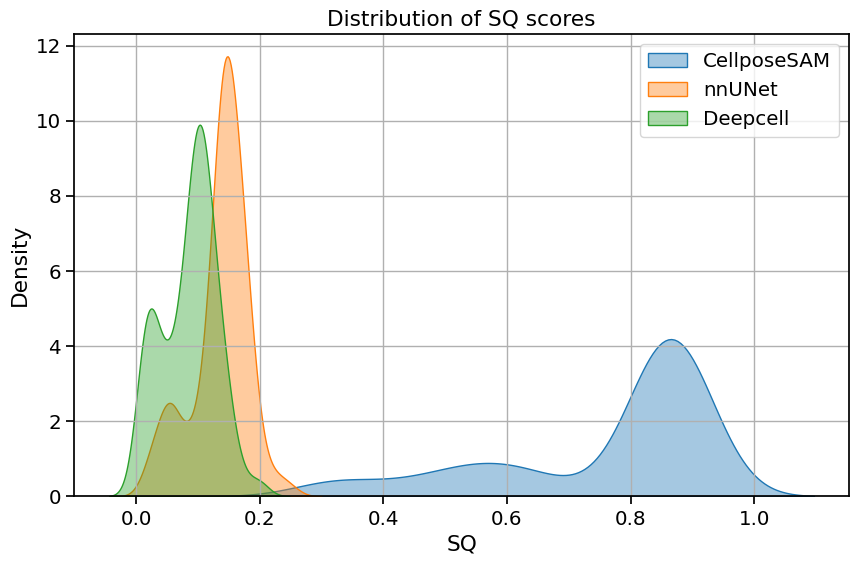

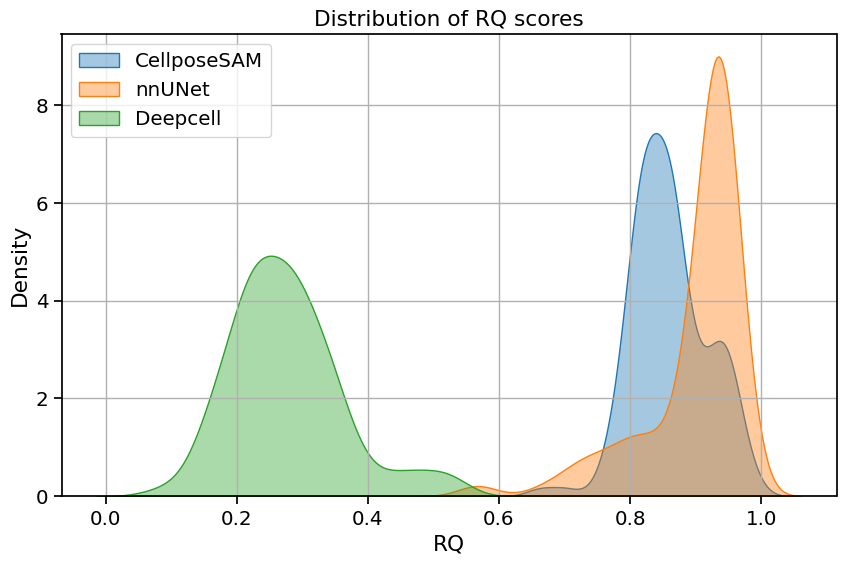

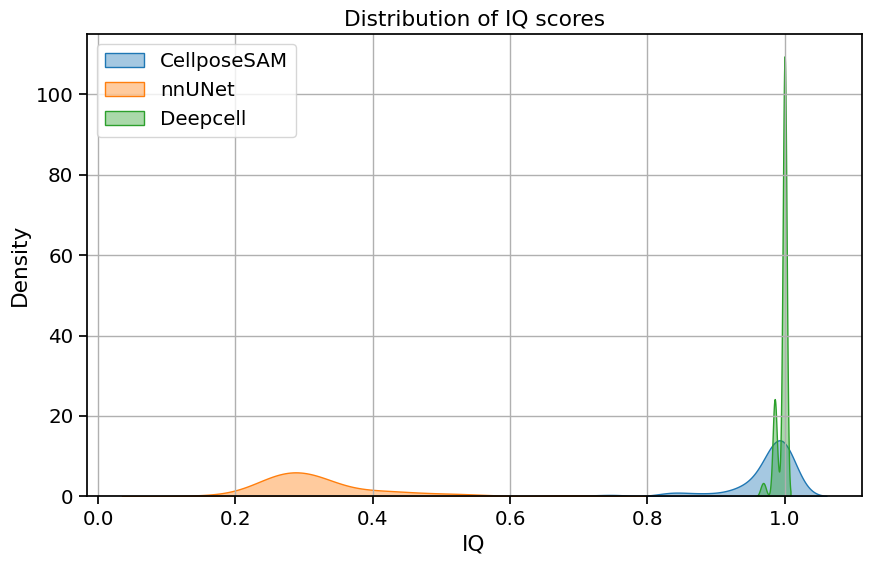

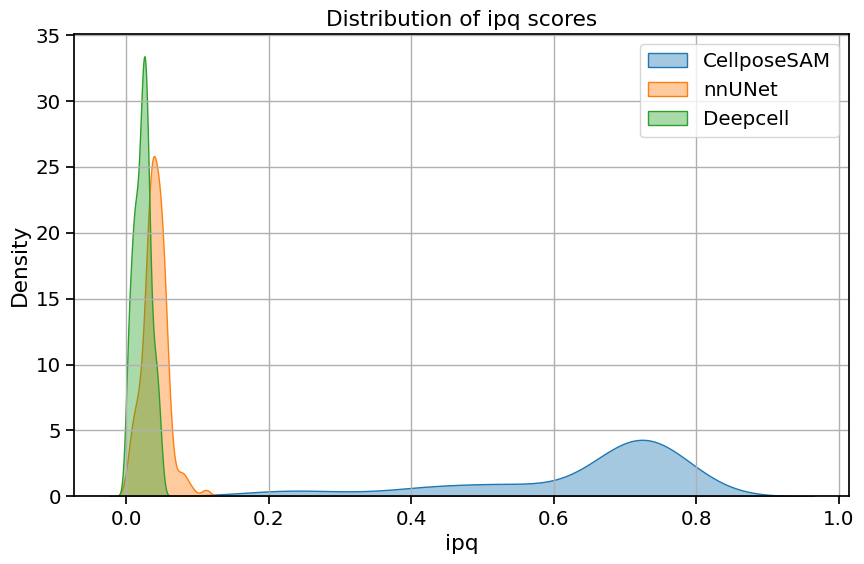

In [53]:
def plot_distributions(data, metrics, network_names):
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for i, net in enumerate(data):
            sns.kdeplot(net[metric], label=network_names[i], fill=True, alpha=0.4)
        plt.title(f'Distribution of {metric} scores')
        plt.xlabel(metric)
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show()
plot_distributions(data, metrics, network_names)
